In [1]:
import pandas as pd
import numpy as np
from Bio import SeqIO
import matplotlib.pyplot as plt
from random import shuffle
import os
from os import listdir
from os.path import isfile, join
from operator import itemgetter
import pickle
import time
import pysam
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats

In [2]:
import sys
sys.path.insert(0, "/home/groups/song/songlab2/somangk2/jupyter/jupyter/PrimeEditor/NatureBiotech")
from regressors import stats

In [3]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams["axes.labelsize"]="xx-large"
mpl.rcParams["xtick.labelsize"]="xx-large"
mpl.rcParams["ytick.labelsize"]="xx-large"
mpl.rcParams["legend.fontsize"]="xx-large"

In [4]:
wholeDF = pd.read_csv("./ER_PBS_RT.csv",skiprows=0, header=1)

ERDF = {}
for PBSL in list(set(wholeDF["PBS length"])):
    ERDF[PBSL] = wholeDF[wholeDF["PBS length"]==PBSL].copy()

guideSeq = {}
for PBSL in list(set(wholeDF["PBS length"])):
    for RTTL in [10,12,15,20]:
        guideSeq[PBSL, RTTL] = set(ERDF[PBSL][(ERDF[PBSL]["RT length"]==RTTL)]["Guide sequence ((G/g)N19)"])

seq2stay = {}
for PBSL in list(set(wholeDF["PBS length"])):
    seq2stay[PBSL] = guideSeq[PBSL,10]
    for RTTL in [12,15,20]:
        seq2stay[PBSL] = seq2stay[PBSL].intersection(guideSeq[PBSL,RTTL])
        
for PBSL in list(set(wholeDF["PBS length"])):
    bool_col = []
    for seq in ERDF[PBSL]["Guide sequence ((G/g)N19)"]:
        if seq in seq2stay[PBSL]:
            bool_col.append(1)
        else:
            bool_col.append(0)
    ERDF[PBSL]["bool"] = bool_col
    ERDF[PBSL] = ERDF[PBSL][ERDF[PBSL]["bool"]==1]
    ERDF[PBSL]=ERDF[PBSL].sort_values(by=["Guide sequence ((G/g)N19)","RT length"])
    
simpDF = {}
for PBSL in list(set(wholeDF["PBS length"])):
    lst = []
    for row in ERDF[PBSL].itertuples():
        if row[7]==10:
            tmp = [row[-2]]
        elif row[7]==12:
            tmp.append(row[-2])
        elif row[7]==15:
            tmp.append(row[-2])
        elif row[7]==20:
            tmp.append(row[-2])
            tmp.append(row[3])
            lst.append(tmp)
    simpDF[PBSL] = pd.DataFrame(lst)
    simpDF[PBSL].columns=["ER10", "ER12", "ER15", "ER20", "seq"]
    
for PBSL in list(set(wholeDF["PBS length"])):
    simpDF[PBSL]["delER12_10"]=simpDF[PBSL]["ER12"]-simpDF[PBSL]["ER10"]
    simpDF[PBSL]["delER15_10"]=simpDF[PBSL]["ER15"]-simpDF[PBSL]["ER10"]
    simpDF[PBSL]["delER20_10"]=simpDF[PBSL]["ER20"]-simpDF[PBSL]["ER10"]
    simpDF[PBSL]["delER15_12"]=simpDF[PBSL]["ER15"]-simpDF[PBSL]["ER12"]
    simpDF[PBSL]["delER20_15"]=simpDF[PBSL]["ER20"]-simpDF[PBSL]["ER15"]
    simpDF[PBSL]["delER20_12"]=simpDF[PBSL]["ER20"]-simpDF[PBSL]["ER12"]

In [8]:
wholeDF = pd.read_csv("./ER_PBS_RT.csv",skiprows=0, header=1)

ERDF1 = {}
for RTTL in list(set(wholeDF["RT length"])):
    ERDF1[RTTL] = wholeDF[wholeDF["RT length"]==RTTL].copy()

guideSeq = {}
for RTTL in list(set(wholeDF["RT length"])):
    for PBSL in list(set(wholeDF["PBS length"])):
        guideSeq[PBSL, RTTL] = set(ERDF1[RTTL][(ERDF1[RTTL]["PBS length"]==PBSL)]["Guide sequence ((G/g)N19)"])

seq2stay1 = {}
for RTTL in list(set(wholeDF["RT length"])):
    seq2stay1[RTTL] = guideSeq[7,RTTL]
    for PBSL in [9,11,13,15,17]:
        seq2stay1[RTTL] = seq2stay1[RTTL].intersection(guideSeq[PBSL,RTTL])
        
for RTTL in list(set(wholeDF["RT length"])):
    bool_col = []
    for seq in ERDF1[RTTL]["Guide sequence ((G/g)N19)"]:
        if seq in seq2stay1[RTTL]:
            bool_col.append(1)
        else:
            bool_col.append(0)
    ERDF1[RTTL]["bool"] = bool_col
    ERDF1[RTTL] = ERDF1[RTTL][ERDF1[RTTL]["bool"]==1]
    ERDF1[RTTL] = ERDF1[RTTL].sort_values(by=["Guide sequence ((G/g)N19)","PBS length"])
    
simpDF1 = {}
for RTTL in list(set(wholeDF["RT length"])):
    lst = []
    for row in ERDF1[RTTL].itertuples():
        if row[6]==7:
            tmp = [row[-2]]
        elif row[6]==17:
            tmp.append(row[-2])
            tmp.append(row[5])
            lst.append(tmp)
        else:
            tmp.append(row[-2])
    simpDF1[RTTL] = pd.DataFrame(lst)
    simpDF1[RTTL].columns=["ER7", "ER9", "ER11", "ER13", "ER15", "ER17", "seq"]
    
# for PBSL in list(set(wholeDF["PBS length"])):
#     simpDF[PBSL]["delER12_10"]=simpDF[PBSL]["ER12"]-simpDF[PBSL]["ER10"]
#     simpDF[PBSL]["delER15_10"]=simpDF[PBSL]["ER15"]-simpDF[PBSL]["ER10"]
#     simpDF[PBSL]["delER20_10"]=simpDF[PBSL]["ER20"]-simpDF[PBSL]["ER10"]
#     simpDF[PBSL]["delER15_12"]=simpDF[PBSL]["ER15"]-simpDF[PBSL]["ER12"]
#     simpDF[PBSL]["delER20_15"]=simpDF[PBSL]["ER20"]-simpDF[PBSL]["ER15"]
#     simpDF[PBSL]["delER20_12"]=simpDF[PBSL]["ER20"]-simpDF[PBSL]["ER12"]

In [48]:
nuc2vec={}
for i1,N1 in enumerate(["A","C","G","T"]):
        nuc2vec[N1]=i1
        
dinuc2vec={}
for i1,N1 in enumerate(["A","C","G","T"]):   
    for i2,N2 in enumerate(["A","C","G","T"]):
        dinuc2vec[N1+N2]=4*i1+i2
        
dinuc2vec2={}
for i1,N1 in enumerate(["A","C","G","T"]):   
    for i2,N2 in enumerate(["A","C","G"]):
        dinuc2vec2[N1+N2]=3*i1+i2
        
dinuc2vec3={}
for i1,N1 in enumerate(["A","C","G"]):   
    for i2,N2 in enumerate(["A","C","G","T"]):
        dinuc2vec3[N1+N2]=4*i1+i2

trinuc2vec={}
for i1,N1 in enumerate(["A","C","G","T"]):   
    for i2,N2 in enumerate(["A","C","G","T"]):
        for i3,N3 in enumerate(["A","C","G","T"]):
            trinuc2vec[N1+N2+N3]=16*i1+4*i2+i3

def seq2nuc(seq):
    L=len(seq)
    vec=np.zeros((3,))
    for i in range(L):
        j=nuc2vec[seq[i]]
        if j!=3:
            vec[j]+=1
    return vec
            
def seq2dinuc(seq,TT=False):
    L=len(seq)
    if TT:
        vec=np.zeros((16,))
        for i in range(L-1):
            j=dinuc2vec[seq[i:i+2]]
            vec[j]+=1
    else:
        vec=np.zeros((15,))
        for i in range(L-1):
            j=dinuc2vec[seq[i:i+2]]
            if j!=15:
                vec[j]+=1
    return vec

def seq2dinuc2(seq):
    L=len(seq)
    vec=np.zeros((12,))
    for i in range(L-1):
        if seq[i+1]!="T":
            j=dinuc2vec2[seq[i:i+2]]
            vec[j]+=1
    return vec

def seq2dinuc3(seq):
    L=len(seq)
    vec=np.zeros((12,))
    for i in range(L-1):
        if seq[i]!="T":
            j=dinuc2vec3[seq[i:i+2]]
            vec[j]+=1
    return vec

def seq2trinuc(seq):
    L=len(seq)
    vec=np.zeros((63,))
    for i in range(L-2):
        j=trinuc2vec[seq[i:i+3]]
        if j!=63:
            vec[j]+=1
    return vec

def coef2diff(seq, d1, d2):
    if d1==10 and d2==12:
        return np.sum(coef2[0,:]*seq2dinuc(seq,TT=True))
    elif d1==12 and d2==15:
        return np.sum(coef2[1,:]*seq2dinuc(seq,TT=True))
    elif d1==15 and d2==20:
        return np.sum(coef2[2,:]*seq2dinuc(seq,TT=True))
    elif d1==10 and d2==15:
        return coef2diff(seq[0:3], 10, 12)+coef2diff(seq[2:], 12, 15)
    elif d1==10 and d2==20:
        return coef2diff(seq[0:3], 10, 12)+coef2diff(seq[2:6], 12, 15)+coef2diff(seq[5:], 15, 20)
    elif d1==12 and d2==20:
        return coef2diff(seq[0:4], 12, 15)+coef2diff(seq[3:], 15, 20)
    else:
        print("error")

### del ER(RT)

In [7]:
# ### seq2nuc-last nucleotide at RTTL1 and RTTL2
# PBSL = 13

# tmp = {}
# for RTTL1, RTTL2 in zip([10,12,15],[12,15,20]):
#     Y = simpDF[PBSL]["delER%d_%d" % (RTTL2,RTTL1)]
#     X = np.zeros((len(simpDF[PBSL]),6))
#     k=0
#     for row in simpDF[PBSL].itertuples():
#         X[k,:3]=seq2nuc(row.seq[RTTL1-20-1])
#         X[k,3:]=seq2nuc(row.seq[RTTL2-20-1])
#         k+=1

#     reg = LinearRegression().fit(X, Y)
#     print(RTTL1, RTTL2, reg.score(X, Y))

#     tmp[RTTL2,RTTL1] = list(reg.coef_)+[reg.intercept_]
# #     if RTTL1==10:break

10 12 0.06626145169362807
12 15 0.07955909459327504
15 20 0.09888353633576986


In [15]:
import random
N = len(simpDF[PBSL])
index = list(range(N))
random.shuffle(index)
CV1 = index[:int(N*0.2)]
CV2 = index[int(N*0.2):int(N*0.4)]
CV3 = index[int(N*0.4):int(N*0.6)]
CV4 = index[int(N*0.6):int(N*0.8)]
CV5 = index[int(N*0.8):]

In [46]:
tmp = {}
for RTTL1, RTTL2 in zip([10,12,15],[12,15,20]):

    if RTTL2==20:break

In [73]:
### seq2nuc-cv5-7predictor
PBSL = 13

tmp = {}
for RTTL1, RTTL2 in zip([10,12,15],[12,15,20]):
    CV = CV2+CV3+CV4+CV5
    Y = simpDF[PBSL].loc[CV,"delER%d_%d" % (RTTL2,RTTL1)]
    X = np.zeros((len(CV),6))
    k=0
    for row in simpDF[PBSL].loc[CV,:].itertuples():
        X[k,:3]=seq2nuc(row.seq[RTTL1-20-1])
        X[k,3:]=seq2nuc(row.seq[RTTL2-20-1])
        for j in range(RTTL1-20,RTTL2-20-1):
            X[k,:3]+=seq2nuc(row.seq[j])
            X[k,3:]+=seq2nuc(row.seq[j])
        k+=1

    reg = LinearRegression().fit(X, Y)
    print(RTTL1, RTTL2, reg.score(X, Y))

    tmp[RTTL2,RTTL1] = list(reg.coef_)+[reg.intercept_]
    
    CV = CV1
    Y1 = simpDF[PBSL].loc[CV,"delER%d_%d" % (RTTL2,RTTL1)]
    X1 = np.zeros((len(CV),6))
    k=0
    for row in simpDF[PBSL].loc[CV,:].itertuples():
        X1[k,:3]=seq2nuc(row.seq[RTTL1-20-1])
        X1[k,3:]=seq2nuc(row.seq[RTTL2-20-1])
        for j in range(RTTL1-20,RTTL2-20-1):
            X1[k,:3]+=seq2nuc(row.seq[j])
            X1[k,3:]+=seq2nuc(row.seq[j])
        k+=1
        
    print(scipy.stats.pearsonr(reg.predict(X1),Y1))

10 12 0.12588899898937767
(0.2738222978251563, 1.7286571008700423e-06)
12 15 0.07028321781897184
(0.2325456542716483, 5.3576224614966726e-05)
15 20 0.10791385465465897
(0.3404892229786822, 1.811638747281576e-09)


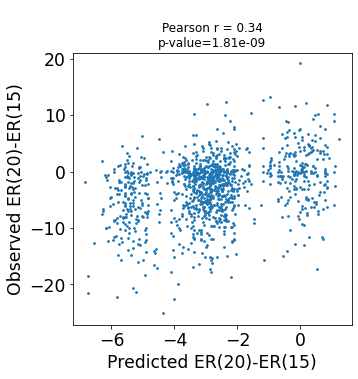

In [75]:
plt.figure(figsize=(5,5))
plt.scatter(reg.predict(X),Y,s=3)
plt.xlabel("Predicted ER(%d)-ER(%d)" % (RTTL2,RTTL1))
plt.ylabel("Observed ER(%d)-ER(%d)" % (RTTL2,RTTL1))
plt.title("\nPearson r = %.2f\np-value=%.2e" % scipy.stats.pearsonr(reg.predict(X1),Y1))
# plt.xlim([min(Y1)-3,max(Y1)+3])
plt.ylim([min(Y1)-3,max(Y1)+3])
plt.show()

In [49]:
### seq2nuc
PBSL = 13

tmp = {}
for RTTL1, RTTL2 in zip([10,12,15],[12,15,20]):
    Y = simpDF[PBSL]["delER%d_%d" % (RTTL2,RTTL1)]
    X = np.zeros((len(simpDF[PBSL]),6))
    k=0
    for row in simpDF[PBSL].itertuples():
        X[k,:3]=seq2nuc(row.seq[RTTL1-20-6-1])
        X[k,3:]=seq2nuc(row.seq[RTTL2-20-6-1])
        for j in range(RTTL1-20-6,RTTL2-20-6-1):
            X[k,:3]+=seq2nuc(row.seq[j])
            X[k,3:]+=seq2nuc(row.seq[j])
        k+=1

    reg = LinearRegression().fit(X, Y)
    print(RTTL1, RTTL2, reg.score(X, Y))

    tmp[RTTL2,RTTL1] = list(reg.coef_)+[reg.intercept_]
    if RTTL1==15:break

10 12 0.11403034625444751
12 15 0.06736027377161036
15 20 0.11058331468470538


In [50]:
xlabel=["N[i]=A","N[i]=C","N[i]=G","N[i+1]=A","N[i+1]=C","N[i+1]=G" ]
stats.summary(reg,X,Y,xlabel)

Residuals:
     Min      1Q  Median      3Q      Max
-21.8407 -3.2632 -0.7405  2.7351  20.5438


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept -3.896568    0.510305  -7.6358  0.000000
N[i]=A      0.237440    0.219206   1.0832  0.278905
N[i]=C      0.057253    0.211034   0.2713  0.786199
N[i]=G      2.872082    0.212582  13.5105  0.000000
N[i+1]=A   -0.407743    0.216826  -1.8805  0.060234
N[i+1]=C    0.461396    0.209435   2.2030  0.027745
N[i+1]=G   -2.445416    0.218203 -11.2071  0.000000
---
R-squared:  0.11058,    Adjusted R-squared:  0.10697
F-statistic: 30.61 on 6 features


In [51]:
coef=np.array([tmp[12,10],tmp[15,12],tmp[20,15]])
coef1=np.array([tmp[12,10]]*2+[tmp[15,12]]*3+[tmp[20,15]]*5)
coef2=coef.copy()
# coef2[0,:-1]=coef2[0,:-1]+coef2[0,-1]/2
# coef2[1,:-1]=coef2[1,:-1]+coef2[1,-1]/3
# coef2[2,:-1]=coef2[2,:-1]+coef2[2,-1]/5
coef2[0,-1]=coef2[0,-1]/2
coef2[1,-1]=coef2[1,-1]/3
coef2[2,-1]=coef2[2,-1]/5
coef3 = np.concatenate([coef2[0:1,:],coef2[0:1,:],coef2[1:2,:],coef2[1:2,:],coef2[1:2,:],coef2[2:3,:],coef2[2:3,:],coef2[2:3,:],coef2[2:3,:],coef2[2:3,:]])


In [ ]:
###Liu

In [53]:
edit_rate = pickle.load(open("../edit_rate.pkl","rb"))
edit_rate_aveRep = {}
for gene in ["EMX1","HEK4","RNF2","FANCF","HEK3","VEGFA","DNMT1","RUNX1"]:
    RTstart=10
    RTend=20
    for RT in range(RTstart, RTend+1):
        edit_rate_aveRep[(gene, RT)] = np.mean([edit_rate[(gene, str(RT), rep)] for rep in ["rep1","rep2","rep3"]])

In [54]:
RTseq_edited = {}
RTseq_edited["HEK4"] = "TTGGGGTTAAAGCGGAGACT"
RTseq_edited["HEK3"] = "AGATGGCAGAGGAAAGGAAG"
RTseq_edited["RNF2"] = "ATGAGGTGTTCGTTGTAACT"
RTseq_edited["RUNX1"] = "CGATTGCTTCAGACAGCATA"
RTseq_edited["VEGFA"] = "TGAGTGCTCCAGATGGCACA"
RTseq_edited["FANCF"] = "ACCTTGATCGCTTTTCCGAG"
RTseq_edited["EMX1"] = "CAAGGGCTCCCATCACATCA"
RTseq_edited["DNMT1"] = "ACAGTGGTGACGGGAGGGCA"

In [130]:
### testing on Liu, trained on Nat.Biotech. with seq2nuc

Y_pred = {}
Y = {}
delY_pred = {}
delY = {}

for gene in ["HEK4","RNF2","HEK3","DNMT1","EMX1","RUNX1","VEGFA","FANCF"]:
    i=0
    Y[gene]=np.zeros((11,))
    Y_pred[gene]=np.zeros((11,))
    delY[gene]=np.zeros((11,))
    delY_pred[gene]=np.zeros((11,))
    for RT in range(10, 21):
        N0 = RTseq_edited[gene][RT-2]
        N1 = RTseq_edited[gene][RT-1]
        if RT<20:
            N2 = RTseq_edited[gene][RT]
        else: N2 = 4
        if RT<19:
            N3 = RTseq_edited[gene][RT+1]
        else: N3 = 4
#         if RT!=10:
# #             Y_pred[gene][i:]+=coef3[-1,nuc2vec[N0]]+coef3[-1,nuc2vec[N1]+3]+coef3[-1,-1]
#             if N0!=3: delY_pred[gene][i]+=coef3[2,nuc2vec[N0]]
#             if N1!=3: delY_pred[gene][i]+=coef3[2,nuc2vec[N1]+3]
#             delY_pred[gene][i]+=coef3[2,-1]
        if RT>=11 and RT<=12:
            if N0!=3: delY_pred[gene][i]+=coef3[0,nuc2vec[N0]]
            if N1!=3: delY_pred[gene][i]+=coef3[0,nuc2vec[N1]+3]
#             if N2==1: delY_pred[gene][i]-=coef3[0,-2]
#             if N3==1: delY_pred[gene][i]+=coef3[0,-2]
            delY_pred[gene][i]+=coef3[0,-1]
        elif RT>=13 and RT<=15:
            if N0!=3: delY_pred[gene][i]+=coef3[1,nuc2vec[N0]]
            if N1!=3: delY_pred[gene][i]+=coef3[1,nuc2vec[N1]+3]
#             if N2==1: delY_pred[gene][i]-=coef3[1,-2]
#             if N3==1: delY_pred[gene][i]+=coef3[1,-2]
            delY_pred[gene][i]+=coef3[1,-1]
        elif RT>=16 and RT<=20:
            if N0!=3: delY_pred[gene][i]+=coef3[2,nuc2vec[N0]]
            if N1!=3: delY_pred[gene][i]+=coef3[2,nuc2vec[N1]+3]
#             if N2==1: delY_pred[gene][i]-=coef3[2,-2]
#             if N3==1: delY_pred[gene][i]+=coef3[2,-2]
            delY_pred[gene][i]+=coef3[2,-1]
        elif RT==10:
            1==1
        else: print("error")
        Y_pred[gene][i:]+=delY_pred[gene][i]
        Y[gene][i] = edit_rate_aveRep[(gene, RT)]
        if RT!=10: delY[gene][i] = (edit_rate_aveRep[(gene, RT)]-edit_rate_aveRep[(gene, RT-1)])*100
        i+=1
        
for gene in ["HEK4","RNF2","HEK3","DNMT1","EMX1","RUNX1","VEGFA","FANCF"]:
    Y_pred[gene]+=np.mean(Y[gene])*100-np.mean(Y_pred[gene])

In [131]:
gene_list = ["HEK4","RNF2","HEK3","DNMT1","EMX1","RUNX1","VEGFA","FANCF"]
x=np.concatenate([delY[gene][1:] for gene in gene_list]).flatten()
y=np.concatenate([delY_pred[gene][1:] for gene in gene_list]).flatten()
scipy.stats.pearsonr(x,y)

(0.19828360702733966, 0.07787659776467663)

In [132]:
for gene in gene_list:
    tmpx = np.concatenate([delY[gene][1:3] for gene in gene_list]).flatten()
    tmpy = np.concatenate([delY_pred[gene][1:3] for gene in gene_list]).flatten()
    delY_pred[gene][1:3] = (delY_pred[gene][1:3]-np.mean(tmpy))/np.std(tmpy)*np.std(tmpx)+np.mean(tmpx)
    
    
    tmpx = np.concatenate([delY[gene][3:6] for gene in gene_list]).flatten()
    tmpy = np.concatenate([delY_pred[gene][3:6] for gene in gene_list]).flatten()
    delY_pred[gene][3:6] = (delY_pred[gene][3:6]-np.mean(tmpy))/np.std(tmpy)*np.std(tmpx)+np.mean(tmpx)
    
    
    tmpx = np.concatenate([delY[gene][6:11] for gene in gene_list]).flatten()
    tmpy = np.concatenate([delY_pred[gene][6:11] for gene in gene_list]).flatten()
    delY_pred[gene][6:11] = (delY_pred[gene][6:11]-np.mean(tmpy))/np.std(tmpy)*np.std(tmpx)+np.mean(tmpx)

In [134]:
gene_list = ["HEK4","RNF2","HEK3","DNMT1","EMX1","RUNX1","VEGFA","FANCF"]
x=np.concatenate([delY[gene][1:] for gene in gene_list]).flatten()
y=np.concatenate([delY_pred[gene][1:] for gene in gene_list]).flatten()
scipy.stats.pearsonr(x,y)

(0.21288217569650292, 0.05797291891275653)

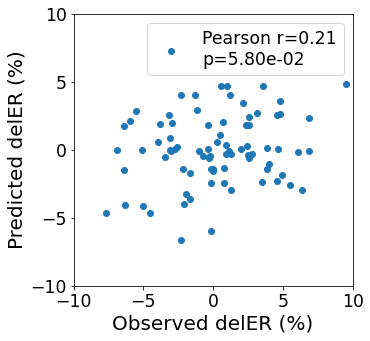

In [135]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, label="Pearson r=%.2f\np=%.2e"%scipy.stats.pearsonr(x,y))
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel("Observed delER (%)",size=20)
plt.ylabel("Predicted delER (%)",size=20)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(5,5))

x=np.concatenate([delY[gene][6:11] for gene in gene_list]).flatten()
y=np.concatenate([delY_pred[gene][6:11] for gene in gene_list]).flatten()

plt.scatter(x,ybar, label="Pearson r=%.2f\np=%.2e"%scipy.stats.pearsonr(x,y))
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel("Observed delER (%)",size=20)
plt.ylabel("Predicted delER (%)",size=20)
plt.legend()
plt.show()

In [85]:
prediction = pickle.load(open("../NN_lin_reg_pred_Liu.pkl","rb"))

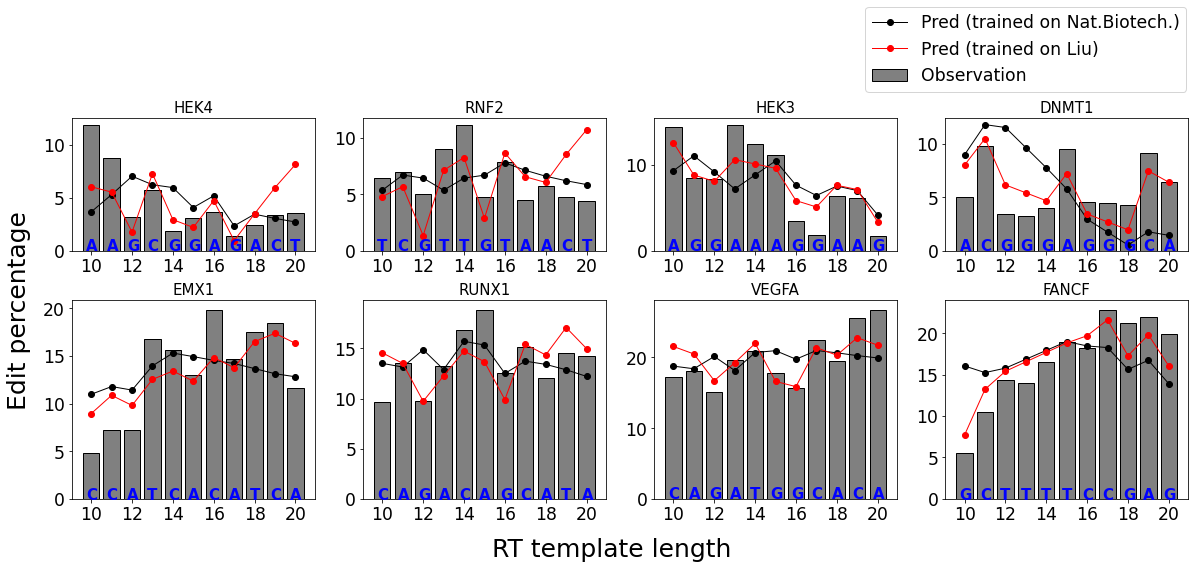

In [86]:
fig, ax = plt.subplots(2,4, figsize=(20,7), gridspec_kw={'height_ratios': [2, 3]})
for i,gene in enumerate(["HEK4","RNF2","HEK3","DNMT1","EMX1","RUNX1","VEGFA","FANCF"]):

    ax[i//4,i%4].bar(range(10,21),Y[gene]*100, color="grey", edgecolor="k", label="Observation")
    ax[i//4,i%4].plot(range(10,21),Y_pred[gene], 'o-k', label="Pred (trained on Nat.Biotech.)")
    ax[i//4,i%4].plot(range(10,21),(np.array(prediction[gene])-np.mean(prediction[gene])+np.mean(Y[gene]))*100, 'o-r', label="Pred (trained on Liu)")

    ax[i//4,i%4].set_title(gene, size=15)
    ax[i//4,i%4].set_xticks([10,12,14,16,18,20])
    
#     major_ticks = np.arange(0, .3, .1)
#     minor_ticks = np.arange(0, .3, .05)
#     ax[i//4,i%4].set_yticks(major_ticks)
#     ax[i//4,i%4].set_yticks(minor_ticks, minor=True)
#     if i//4==0: ax[i//4,i%4].set_ylim([-0.03,0.18])
#     elif i//4==1: ax[i//4,i%4].set_ylim([-0.03,0.28])
    for RT in range(10,21):
        ax[i//4,i%4].text(RT-0.25, -0.025, RTseq_edited[gene][RT-1], size=15, color='blue', fontweight='bold')
fig.text(x=0.5, y=0.01, s="RT template length", size=25, horizontalalignment="center")
fig.text(x=0.08, y=0.5, s="Edit percentage", rotation=90, size=25, verticalalignment="center")
plt.subplots_adjust(hspace=0.3)
plt.legend(loc=[-0.33,2.05])
# plt.savefig("./Fig1C_edit_rate.pdf" ,format="pdf",bbox_inches = "tight")
plt.show()

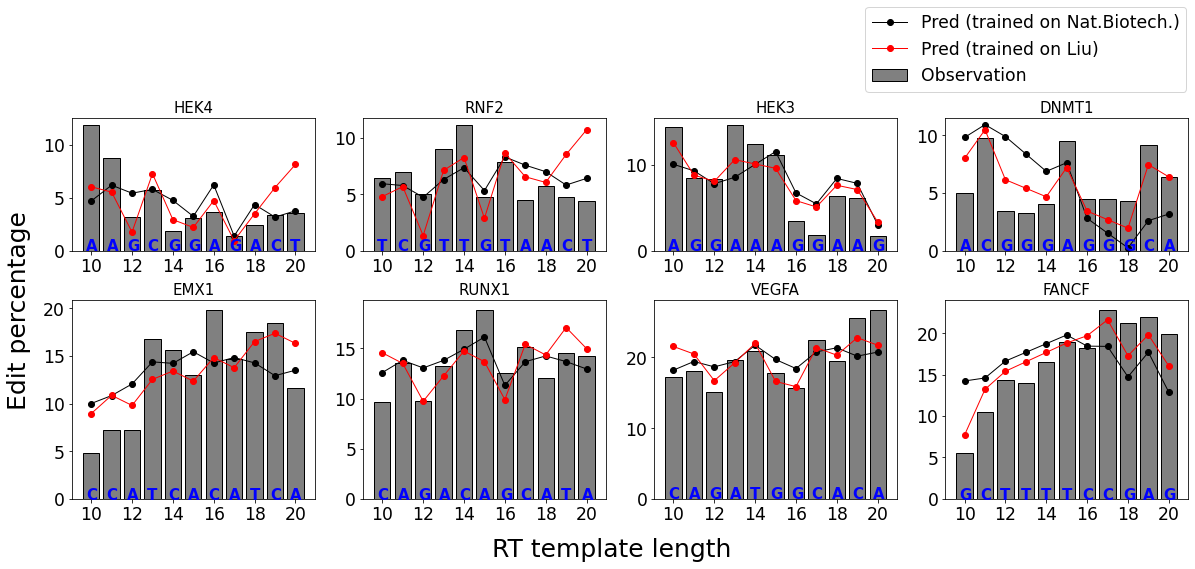

In [97]:
fig, ax = plt.subplots(2,4, figsize=(20,7), gridspec_kw={'height_ratios': [2, 3]})
for i,gene in enumerate(["HEK4","RNF2","HEK3","DNMT1","EMX1","RUNX1","VEGFA","FANCF"]):

    ax[i//4,i%4].bar(range(10,21),Y[gene]*100, color="grey", edgecolor="k", label="Observation")
    ax[i//4,i%4].plot(range(10,21),Y_pred[gene], 'o-k', label="Pred (trained on Nat.Biotech.)")
    ax[i//4,i%4].plot(range(10,21),(np.array(prediction[gene])-np.mean(prediction[gene])+np.mean(Y[gene]))*100, 'o-r', label="Pred (trained on Liu)")

    ax[i//4,i%4].set_title(gene, size=15)
    ax[i//4,i%4].set_xticks([10,12,14,16,18,20])
    
#     major_ticks = np.arange(0, .3, .1)
#     minor_ticks = np.arange(0, .3, .05)
#     ax[i//4,i%4].set_yticks(major_ticks)
#     ax[i//4,i%4].set_yticks(minor_ticks, minor=True)
#     if i//4==0: ax[i//4,i%4].set_ylim([-0.03,0.18])
#     elif i//4==1: ax[i//4,i%4].set_ylim([-0.03,0.28])
    for RT in range(10,21):
        ax[i//4,i%4].text(RT-0.25, -0.025, RTseq_edited[gene][RT-1], size=15, color='blue', fontweight='bold')
fig.text(x=0.5, y=0.01, s="RT template length", size=25, horizontalalignment="center")
fig.text(x=0.08, y=0.5, s="Edit percentage", rotation=90, size=25, verticalalignment="center")
plt.subplots_adjust(hspace=0.3)
plt.legend(loc=[-0.33,2.05])
# plt.savefig("./Fig1C_edit_rate.pdf" ,format="pdf",bbox_inches = "tight")
plt.show()

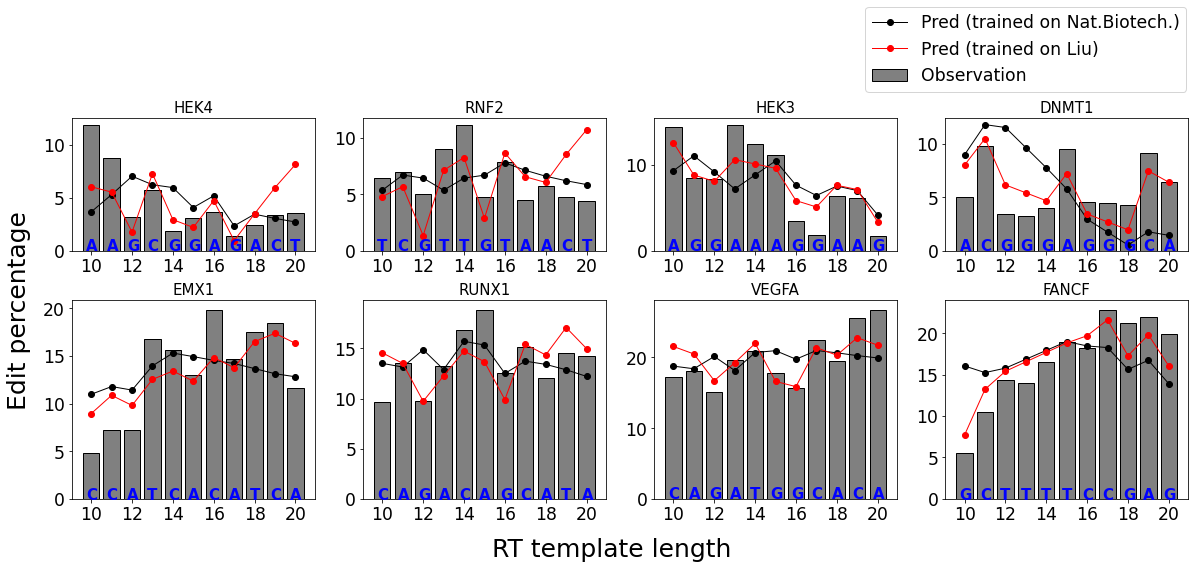

In [290]:
fig, ax = plt.subplots(2,4, figsize=(20,7), gridspec_kw={'height_ratios': [2, 3]})
for i,gene in enumerate(["HEK4","RNF2","HEK3","DNMT1","EMX1","RUNX1","VEGFA","FANCF"]):

    ax[i//4,i%4].bar(range(10,21),Y[gene]*100, color="grey", edgecolor="k", label="Observation")
    ax[i//4,i%4].plot(range(10,21),Y_pred[gene], 'o-k', label="Pred (trained on Nat.Biotech.)")
    ax[i//4,i%4].plot(range(10,21),(np.array(prediction[gene])-np.mean(prediction[gene])+np.mean(Y[gene]))*100, 'o-r', label="Pred (trained on Liu)")

    ax[i//4,i%4].set_title(gene, size=15)
    ax[i//4,i%4].set_xticks([10,12,14,16,18,20])
    
#     major_ticks = np.arange(0, .3, .1)
#     minor_ticks = np.arange(0, .3, .05)
#     ax[i//4,i%4].set_yticks(major_ticks)
#     ax[i//4,i%4].set_yticks(minor_ticks, minor=True)
#     if i//4==0: ax[i//4,i%4].set_ylim([-0.03,0.18])
#     elif i//4==1: ax[i//4,i%4].set_ylim([-0.03,0.28])
    for RT in range(10,21):
        ax[i//4,i%4].text(RT-0.25, -0.025, RTseq_edited[gene][RT-1], size=15, color='blue', fontweight='bold')
fig.text(x=0.5, y=0.01, s="RT template length", size=25, horizontalalignment="center")
fig.text(x=0.08, y=0.5, s="Edit percentage", rotation=90, size=25, verticalalignment="center")
plt.subplots_adjust(hspace=0.3)
plt.legend(loc=[-0.33,2.05])
# plt.savefig("./Fig1C_edit_rate.pdf" ,format="pdf",bbox_inches = "tight")
plt.show()

In [16]:
regressorL = pickle.load( open("../regressor_NN_Liu.pkl","rb"))
print("second last:\t[A, C, T] = ",regressorL.coef_[0][0:3])
print("last:\t\t[A, C, T] = ",regressorL.coef_[0][3:6])
print("intercept = ",regressorL.intercept_[0])
# print("R = ", np.sqrt(regressorL.score(X,dY)))

def dinuc2coefL(NN):
    coef=0
    if NN[0]=="A": coef+=regressorL.coef_[0][0]
    elif NN[0]=="C": coef+=regressorL.coef_[0][1]
    elif NN[0]=="T": coef+=regressorL.coef_[0][2]
    if NN[1]=="A": coef+=regressorL.coef_[0][3]
    elif NN[1]=="C": coef+=regressorL.coef_[0][4]
    elif NN[1]=="T": coef+=regressorL.coef_[0][5]
    coef+=regressorL.intercept_[0]
    return coef*100

def seq2coefL(seq):
    dY = 0
    for j in range(len(seq)-1):
        dY+=dinuc2coefL(seq[j:j+2])
    return dY

second last:	[A, C, T] =  [-0.030358   -0.03593559 -0.04635143]
last:		[A, C, T] =  [0.03272318 0.06250429 0.06512225]
intercept =  -0.0073958917836968174


In [17]:
# dinuc2coefL("AA")
predL_delER15_12 = []
for row in simpDF[PBSL].itertuples():
    seq = row.seq[-9:-5]
    predL_delER15_12.append(seq2coefL(seq))
    

In [18]:
x = simpDF[PBSL].delER15_12.tolist()
y = predL_delER15_12 
scipy.stats.pearsonr(x,y)

(0.23735094236605053, 1.8886237536848357e-20)

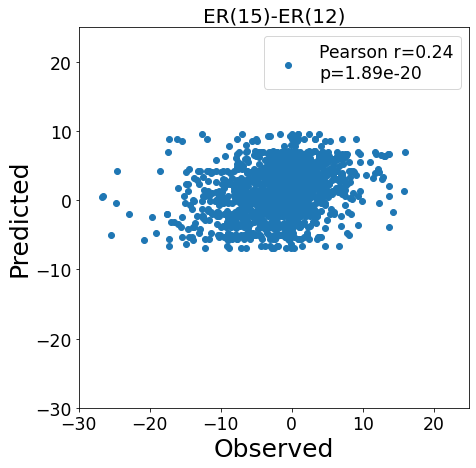

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(x,y, label="Pearson r=%.2f\np=%.2e"%scipy.stats.pearsonr(x,y))
plt.xlim([-30,25])
plt.ylim([-30,25])
plt.xlabel("Observed",size=25)
plt.ylabel("Predicted",size=25)
plt.title("ER(15)-ER(12)",size=20)
plt.legend()
plt.show()